###  Merging data
In this notebook, my goal is to merge datasets based on the organism. 
My rationale is basically: once a hit, always a hit. 

However, for conflicting entries (i.e. identical SMILES with divergent values), this is a bit overly optimistic. So the value will prevail if:
- It comes from a dataset that uses absolute cut-offs instead of standard deviations.
If this can't be done, then the value from the largest dataset will be chosen instead.

In [1]:
import pandas as pd
import os
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.utils.dataset_utils import merge_and_deduplicate, rule

### _E. coli_

In [2]:
stokes = pd.read_csv('../data/processed/stokes_2020_processed.csv')
co_add_ecoli = pd.read_csv('../data/processed/co_add_Escherichia_coli_processed.csv')

In [3]:
ecoli_dataset = merge_and_deduplicate([stokes, co_add_ecoli], 'standardized_smiles', rule=rule)
ecoli_dataset.standardized_smiles.nunique(), ecoli_dataset.shape

2025-10-16 08:40:27.534 | SUCCESS  | src.utils.dataset_utils:merge_and_deduplicate:34 - Merged dataset has 78158 entries; after deduplication, 78115 unique entries remain. (Removed 43 duplicates.)


(78115, (78115, 4))

### _A. baumannii_

In [4]:
swanson_2024 = pd.read_csv('../data/processed/swanson_2024_processed.csv')
liu_2023 = pd.read_csv('../data/processed/liu_2023_processed.csv')
co_add_baumannii = pd.read_csv('../data/processed/co_add_Acinetobacter_baumannii_processed.csv')


In [5]:
a_baumannii_dataset = merge_and_deduplicate([swanson_2024, liu_2023, co_add_baumannii], 'standardized_smiles', rule=rule)

2025-10-16 08:40:41.733 | SUCCESS  | src.utils.dataset_utils:merge_and_deduplicate:34 - Merged dataset has 81210 entries; after deduplication, 75292 unique entries remain. (Removed 5918 duplicates.)


### _S. aureus_

In [6]:
swanson_2025 = pd.read_csv('../data/processed/swanson_2025_processed.csv')
wong_2024 = pd.read_csv('../data/processed/wong_2024_processed.csv')
co_add_s_aureus = pd.read_csv('../data/processed/co_add_Staphylococcus_aureus_processed.csv')

In [7]:
s_aureus_dataset = merge_and_deduplicate([swanson_2025, wong_2024, co_add_s_aureus], 'standardized_smiles', rule=rule)

2025-10-16 08:40:59.886 | SUCCESS  | src.utils.dataset_utils:merge_and_deduplicate:34 - Merged dataset has 97015 entries; after deduplication, 95489 unique entries remain. (Removed 1526 duplicates.)


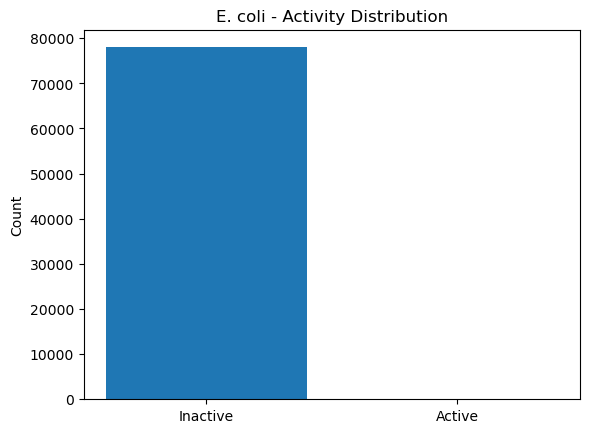

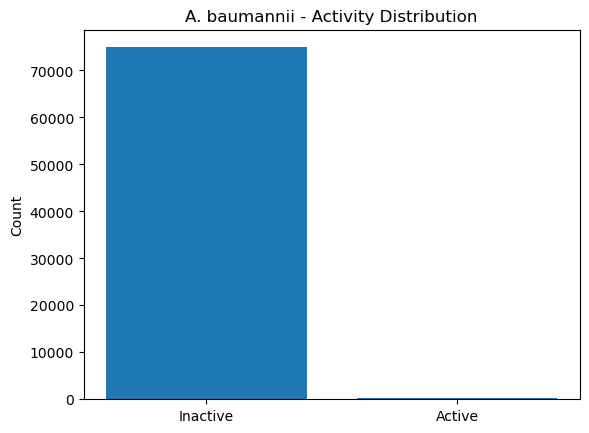

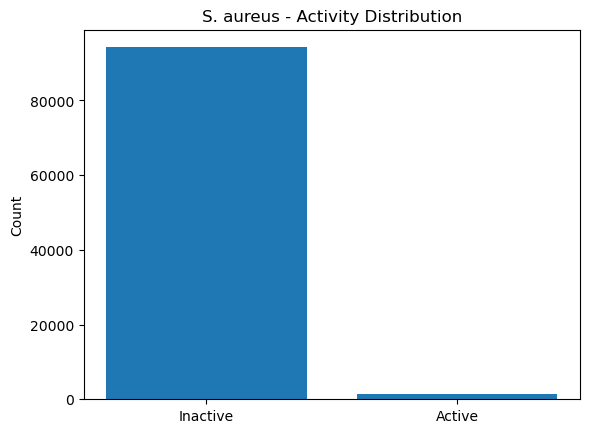

In [8]:
import matplotlib.pyplot as plt

for name, df in zip(
    ["E. coli", "A. baumannii", "S. aureus"],
    [ecoli_dataset, a_baumannii_dataset, s_aureus_dataset]
):
    counts = df['antimicrobial_activity'].value_counts().sort_index()
    plt.bar(['Inactive', 'Active'], counts)
    plt.title(f"{name} - Activity Distribution")
    plt.ylabel("Count")
    plt.show()

In [9]:
# saving
ecoli_dataset.to_csv('../data/merged/ecoli_dataset.csv', index=False)
a_baumannii_dataset.to_csv('../data/merged/a_baumannii_dataset.csv', index=False)
s_aureus_dataset.to_csv('../data/merged/s_aureus_dataset.csv', index=False)